In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio

import matplotlib.animation as animation

In [3]:

files=glob.glob("./*root")


sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))


In [4]:
dump=[]
labels=[]
for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file) as file:
        tree = file['B4;1']
        braunches=['Edep']
        dump.append(tree.arrays( braunches,library="np", 
            decompression_executor=decompression_executor, 
            interpretation_executor=interpretation_executor)['Edep'])

    
    

In [5]:
# num=0
# for i,j in tqdm(zip(dump,labels)):
    
    
#     plt.figure(figsize=(10,5))
#     plt.grid(True)
#     plt.hist(i,bins=np.linspace(0,700,700),label=j)
#     plt.legend()
    
#     plt.yscale('log')
#     plt.ylim(1,5.e3)
#     plt.savefig('../images/{}.png'.format(num))
#     plt.close()
#     num=num+1

In [6]:
# files=glob.glob("../images/*.png")


# sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

# with imageio.get_writer('animated_plot.gif', mode='I', duration=0.1) as writer:
#     for filename in sorted_files:
#         image = imageio.imread(filename)
#         writer.append_data(image)

In [27]:
counts=[]
for i in dump:
    counts.append(np.histogram(i,bins=[660,665])[0])
    
    
counts_1=[]

for i in dump:
    counts_1.append(len(i))

(0.0, 3387.7)

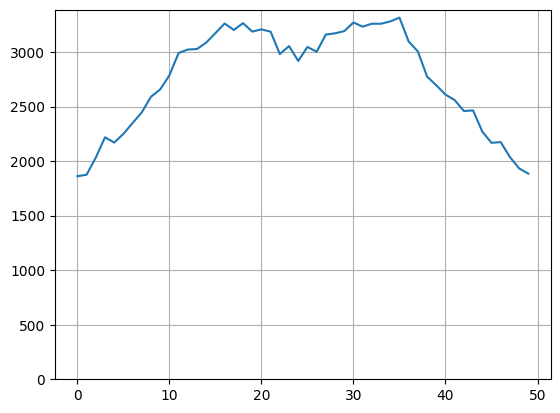

In [28]:
plt.plot(counts)
plt.grid(True)
plt.ylim(bottom=0) 

(0.0, 17121.7)

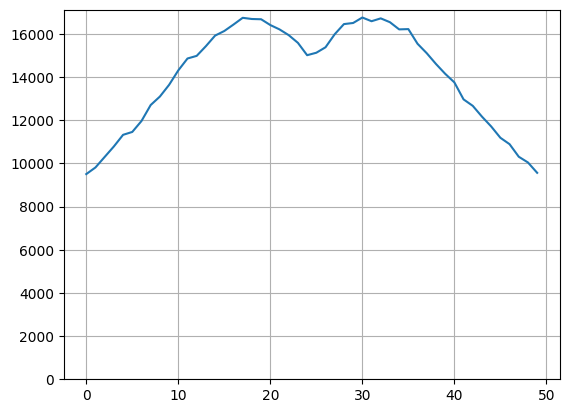

In [29]:
plt.plot(counts_1)
plt.grid(True)
plt.ylim(bottom=0) 

In [66]:
dist=np.linspace(-4,4,50)
h=3.7

alpha=np.arctan(dist/h)
l1=37.8

l2=7.56

max_alpha=np.arctan(l2/l1)
#μ_NaI = 0.03 # mm-1,
μ_NaI = 0.02782 
comp1= (l1*abs(np.sin(alpha))+l2*abs(np.sin(np.pi/2-alpha)))*l2 / (np.pi*4*(dist**2+h**2)*1e6)



sin_list=abs(np.sin(alpha))
             

sin_list[sin_list<=np.sin(max_alpha)]=np.sin(max_alpha)

dist_d=(l2/sin_list)

#comp3=1-np.exp(-μ_NaI*dist_d)

μ_air=1e-5
#μ_air=2.51359E-05
comp4=np.exp(-μ_air*np.sqrt(dist**2+h**2)*1000)

In [67]:
def calculate_mu_angle(ang,step):
    N=100000
    a=np.random.rand(N)
    b=np.random.rand(N)
    points=np.vstack((a,b)).T


    points_ractangle=np.zeros_like(points)
    points_ractangle[:,0]=points[:,0]*l2
    points_ractangle[:,1]=points[:,1]*l1


    #ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    #plt.scatter(points_ractangle[:,0],points_ractangle[:,1],s=0.1)


    #ang=np.pi/16

    R=np.array([[np.cos(ang),-np.sin(ang)],
      [np.sin(ang),np.cos(ang)]])


    points_rac_rot=np.dot(R,points_ractangle.T).T





    xmin=np.min(points_rac_rot[:,0])
    xmax=np.max(points_rac_rot[:,0])
    step=l2/40

    steps=np.arange(xmin,xmax,step)
    
    area=len(steps)
    bounds=np.vstack((steps[:-1],steps[1:])).T

    points_b_count=[]
    for i in bounds:
        points_b_count.append(np.count_nonzero(np.logical_and(points_rac_rot[:,0]>i[0],points_rac_rot[:,0]<i[1])))
    points_b_count=np.array(points_b_count)
    S_g=l1*l2
    density=N/S_g
    S=points_b_count/density
    d=S/step
    return(d,area)


# plt.scatter(points_rac_rot[:,0],points_rac_rot[:,1],s=0.1)
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')

In [68]:
step=l2/40

comp5=[]
for i in tqdm(alpha):
    d,_=calculate_mu_angle(i,step)

    loacal_m = 1-np.exp(-μ_NaI*d)
    comp5.append(np.average(loacal_m))

100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.37it/s]


(0.0, 2.436501336499161e-07)

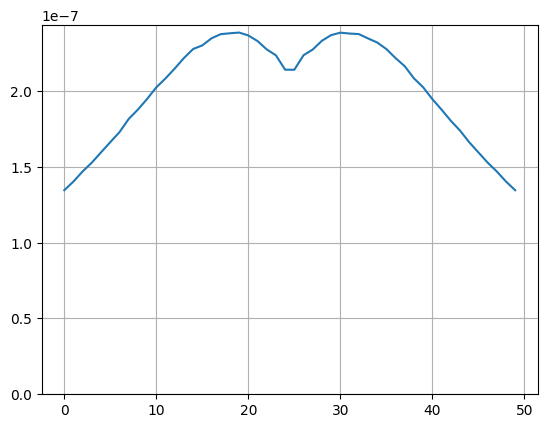

In [69]:
plt.plot(comp1*comp5*comp4)
plt.grid(True)
plt.ylim(bottom=0) 

In [70]:
A0=1000000
angl=0.0075

In [71]:
coef=angl**2/4

In [72]:
A_total=A0/coef

In [73]:
print("{:e}".format(A_total))

7.111111e+10


In [74]:
response=comp1*comp5*comp4*A_total

(0.0, 17329.248719019513)

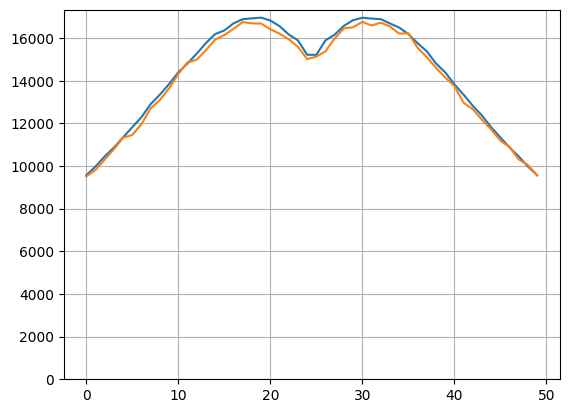

In [75]:
plt.plot(response)
plt.plot(counts_1)
plt.grid(True)
plt.ylim(bottom=0)